In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorboard.notebook import display

In [48]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.duplicated().sum()

np.int64(0)

##### Handling missing values

In [50]:
df['Age'].isna().sum()

np.int64(177)

In [51]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

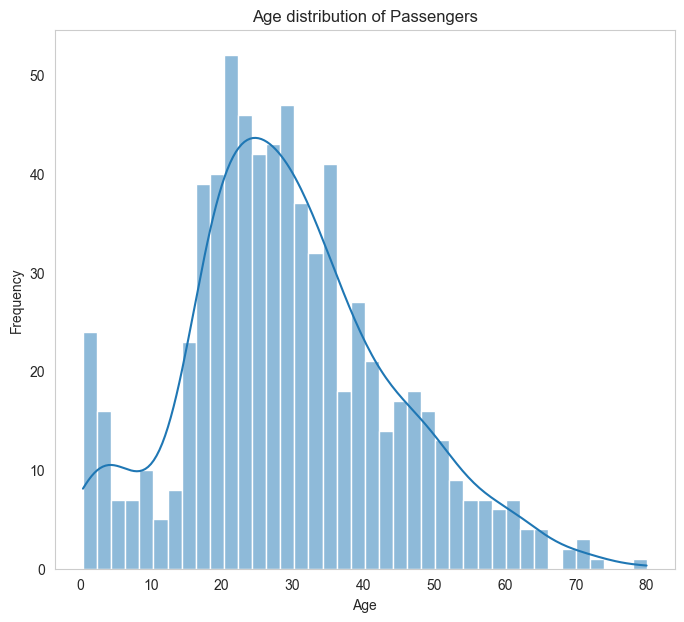

In [52]:
plt.figure(figsize=(8,7))
sns.histplot(data=df,x=df['Age'],kde=True,bins=40)
plt.title('Age distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

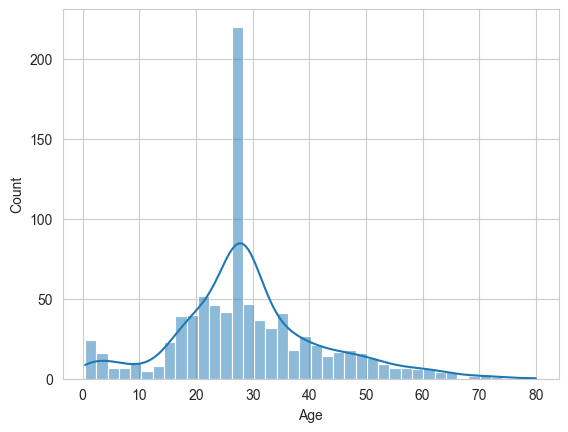

In [53]:
# Age is right skewed, thus we will use median for filling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
sns.histplot(data=df,x=df['Age'],kde=True,bins=40)

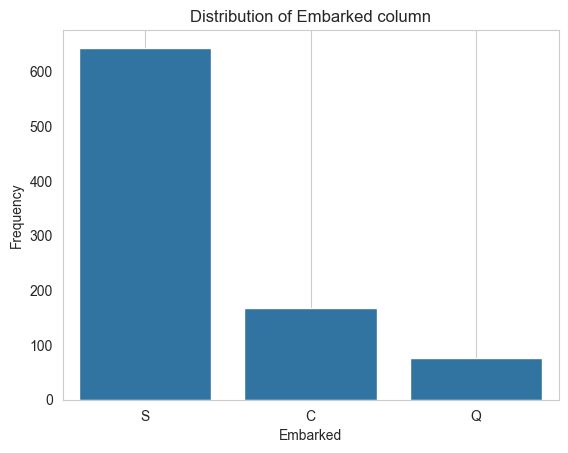

In [54]:
# Distribution of Embarked column
sns.countplot(data=df,x=df['Embarked'])
plt.title('Distribution of Embarked column')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

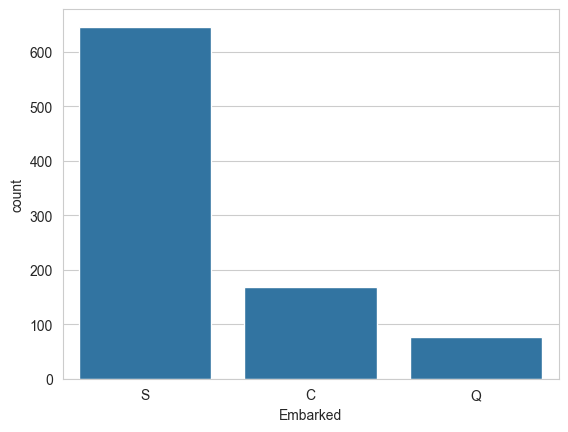

In [55]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
sns.countplot(data=df,x=df['Embarked'])

In [56]:
df.drop(columns=['Cabin'],inplace=True)

In [57]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Encoding

In [58]:
df = pd.read_csv('heart.csv')

In [59]:
categorical = []
numerical = []
for c in df.columns:
    if df[c].dtype == 'object':
        categorical.append(c)
    else:
        numerical.append(c)
categorical,numerical

(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
 ['Age',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'MaxHR',
  'Oldpeak',
  'HeartDisease'])

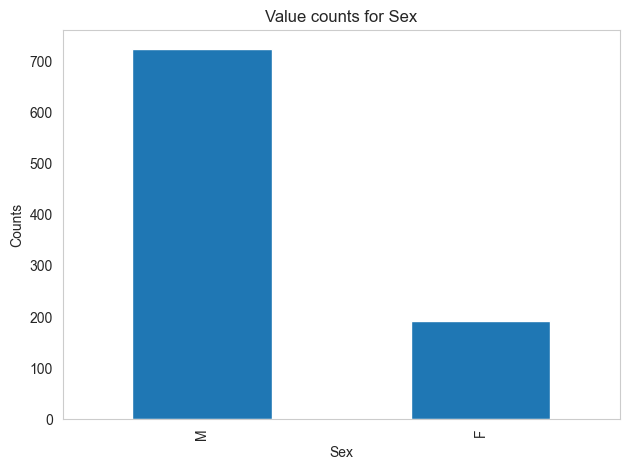

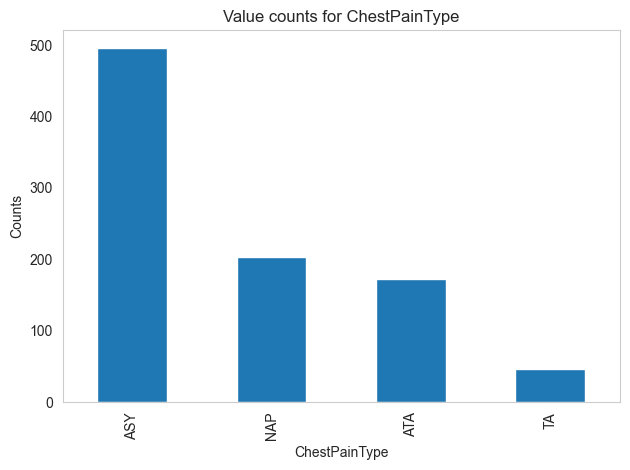

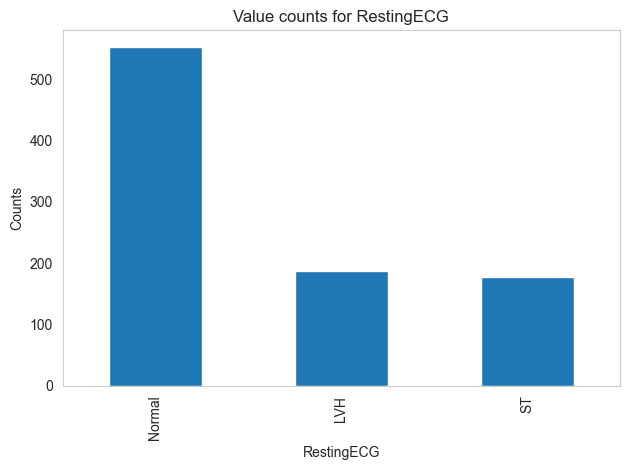

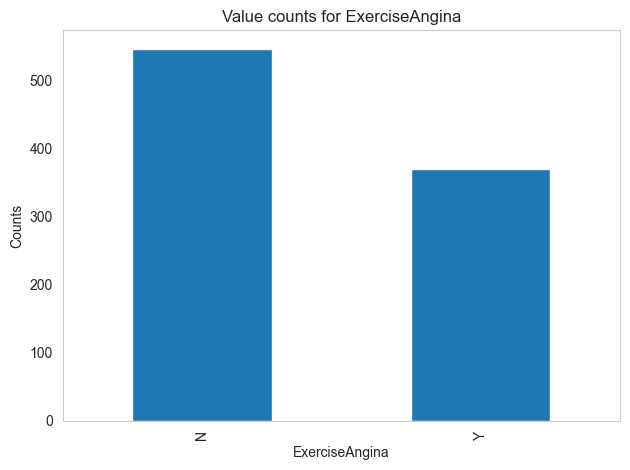

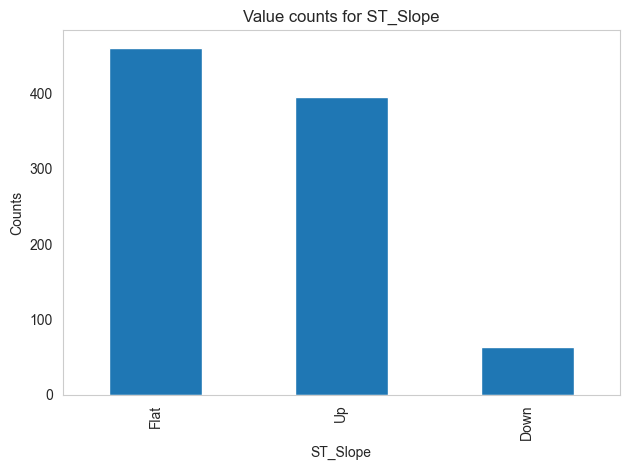

In [60]:
# Categoricat feature exploration
for c in categorical:
    df[c].value_counts().plot(kind='bar')
    plt.title(f'Value counts for {c}')
    plt.xlabel(c)
    plt.ylabel('Counts')
    plt.grid()
    plt.tight_layout()
    plt.show()


In [61]:
# Label Encoding for binary categories(Sex,ExerciseAngina)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [62]:
# OneHot for the others
df_encoded = pd.get_dummies(df,columns=['ST_Slope','ChestPainType', 'RestingECG'],dtype=int)
df_encoded

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,0,0,1,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,1,0,0


##### Normalization

In [63]:
target = 'HeartDisease'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
# Standard Scalling
scaled_sd = StandardScaler()
X_train_std = scaled_sd.fit_transform(X_train) # mean and std will only be calculated from train dataset
X_test_std = scaled_sd.transform(X_test) # mean and std will only be calculated from test dataset
X_test_std_df = pd.DataFrame(X_train_std,columns=X_train.columns,index=X_train.index)

In [65]:
print(X_test_std_df)

          Age       Sex  RestingBP  Cholesterol  FastingBS     MaxHR  \
155  0.239292  0.537019   1.183802     1.307314   1.877849  0.551672   
362  0.239292  0.537019   1.183802    -1.878000  -0.532524 -1.486343   
869  0.558968  0.537019   0.913811     0.096522   1.877849  0.831400   
101 -0.293501  0.537019  -0.166155    -0.210833  -0.532524 -1.446382   
199  0.345851 -1.862131  -0.166155     0.990645  -0.532524 -1.526304   
..        ...       ...        ...          ...        ...       ...   
106 -0.613176 -1.862131  -0.706137     0.487701  -0.532524 -1.046771   
270 -0.932852  0.537019  -0.706137     0.217601  -0.532524  0.152061   
860  0.665526  0.537019  -0.166155     0.478387  -0.532524  0.311906   
435  0.665526  0.537019   1.021807    -1.878000  -0.532524 -0.727083   
102 -1.465645 -1.862131   0.913811     1.773003  -0.532524 -0.247550   

     ExerciseAngina   Oldpeak  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  \
155        1.182037  1.900458      -0.254981       0.962897

In [66]:
# MinMax Scaling
min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_test_min_max = min_max.transform(X_test)
X_train_min_max_df = pd.DataFrame(X_train_min_max,columns=X_train.columns,index=X_train.index)

In [67]:
X_train_min_max_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,0.0,0.600,0.421227,0.0,0.364341,0.0,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
270,0.333333,1.0,0.600,0.373134,0.0,0.596899,0.0,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.645833,1.0,0.650,0.419569,0.0,0.627907,1.0,0.454545,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.645833,1.0,0.760,0.000000,0.0,0.426357,1.0,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)
X_train_rs_df = pd.DataFrame(X_train_rs,columns=X_train.columns,index = X_train.index)

In [69]:
X_train_rs_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
155,0.153846,0.0,1.25,1.307479,1.0,0.324324,1.0,1.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.153846,0.0,1.25,-2.481994,0.0,-1.054054,0.0,-0.375,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,1.0
869,0.384615,0.0,1.00,-0.132964,1.0,0.513514,0.0,0.625,0.0,-1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
101,-0.230769,0.0,0.00,-0.498615,0.0,-1.027027,0.0,-0.375,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.230769,-1.0,0.00,0.930748,0.0,-1.081081,0.0,0.250,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.461538,-1.0,-0.50,0.332410,0.0,-0.756757,0.0,-0.375,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
270,-0.692308,0.0,-0.50,0.011080,0.0,0.054054,0.0,-0.375,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.461538,0.0,0.00,0.321330,0.0,0.162162,1.0,0.500,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.461538,0.0,1.10,-2.481994,0.0,-0.540541,1.0,-0.375,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
